# Data distribution and statistics

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("dataset/TC-dataset.csv", sep="\t",index_col=0,decimal=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BasketID         471910 non-null  object 
 1   BasketDate       471910 non-null  object 
 2   Sale             471910 non-null  float64
 3   CustomerID       406830 non-null  object 
 4   CustomerCountry  471910 non-null  object 
 5   ProdID           471910 non-null  object 
 6   ProdDescr        471157 non-null  object 
 7   Qta              471910 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 32.4+ MB


## BasketID
Il basketID è un nominale vediamo da che caratteri è composto (numeri lettere ecc)

In [4]:
print("MAIUSC: "+str(df.BasketID.str.contains('[A-Z]').any()))
print("minuscole: "+str(df.BasketID.str.contains('[a-z]').any()))
print("Numeri: "+str(df.BasketID.str.contains('[0-9]').any()))
print("Segni speciali: "+str(df.BasketID.str.contains('[^A-Za-z0-9]').any()))

MAIUSC: True
minuscole: False
Numeri: True
Segni speciali: False


## BasketDate
Per questo attributo verifichiamo a che intervallo di date include. Per fare ciò cambiamo il tipo della colonna

In [5]:
df_for_dates=df.copy()
df_for_dates["BasketDate"] = pd.to_datetime(df_for_dates['BasketDate'])
df_for_dates.head()

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


Vediamo che anni sono inclusi

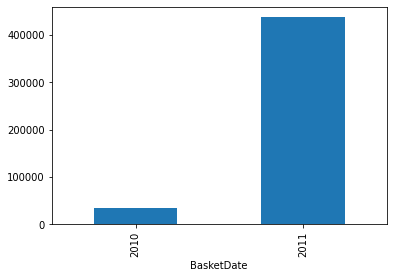

In [6]:
df_for_dates["BasketDate"].groupby(df_for_dates["BasketDate"].dt.year).count().plot(kind="bar")

Verifichiamo la distribuzione dei dati per gli acquisti del 2011

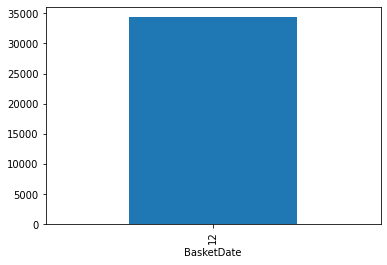

In [7]:
df_for_dates[df_for_dates['BasketDate'] < '2011-01-01']["BasketDate"].groupby(df_for_dates["BasketDate"].dt.month).count().plot(kind="bar")

Verifichiamo la distribuzione dei dati per gli acquisti del 2010

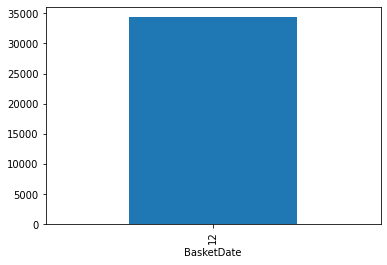

In [8]:

mask=(df_for_dates['BasketDate'] > '2010-01-01' ) & (df_for_dates['BasketDate'] < '2011-01-01')
df_for_dates[mask]["BasketDate"].groupby(df_for_dates["BasketDate"].dt.month).count().plot(kind="bar")

In [9]:
print("Distinct Values in CustomerCountry:\t", df.CustomerCountry.unique(), "Len: \n", len(df.CustomerCountry.unique()))
print("Distinct Values in ProdID:\t", df.ProdID.unique(), "Len: \n", len(df.ProdID.unique()))

Distinct Values in CustomerCountry:	 ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA'] Len: 
 38
Distinct Values in ProdID:	 ['85123A' '71053' '84406B' ... '90214U' '23645' '23843'] Len: 
 3953


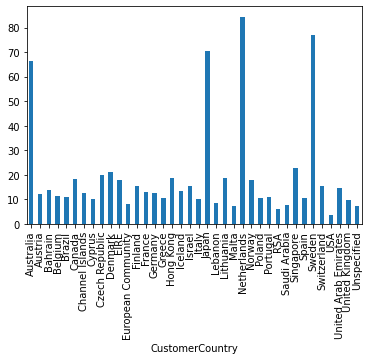

In [10]:
#Ordini medi per nazione
(df.groupby(['CustomerCountry']).mean())["Qta"].plot(kind="bar")


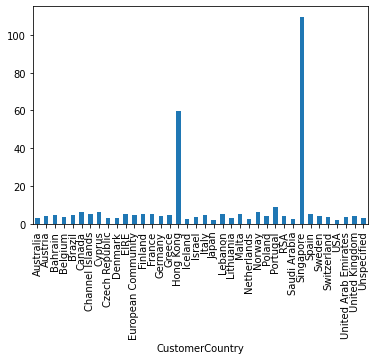

In [11]:
#Sale medio per nazione
df.groupby("CustomerCountry")["Sale"].mean().plot(kind="bar")

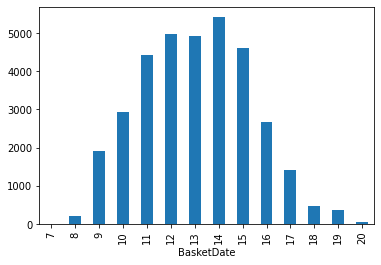

In [12]:
#acquisti per ora effettuati nell'anno 2010.
mask=(df_for_dates['BasketDate'] > '2010-01-01' ) & (df_for_dates['BasketDate'] < '2011-01-01')
df_for_dates[mask]["BasketDate"].groupby(df_for_dates["BasketDate"].dt.hour).count().plot(kind="bar")

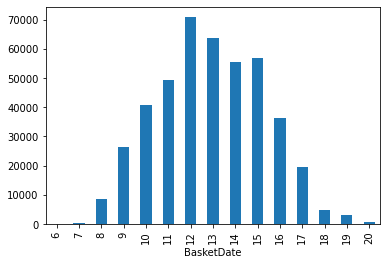

In [13]:
#acquisti per ora effettuati nell'anno 2011.
mask=(df_for_dates['BasketDate'] > '2011-01-01' )
df_for_dates[mask]["BasketDate"].groupby(df_for_dates["BasketDate"].dt.hour).count().plot(kind="bar")

In [14]:
#Ordini effettuati per utente (-1 = Customer ID null)
    #unique basketID per user
print("Iniziali: :" , str(len(df.BasketID)))
print("Unici: ", str(len(df.BasketID.unique())))
temp = df.drop_duplicates(subset=['BasketID'], keep='last')
print("Actual for query: ", str(len(temp.BasketID)))
temp.groupby(by="CustomerID", as_index=True)["BasketID"].count()

Iniziali: : 471910
Unici:  24627
Actual for query:  24627


CustomerID
12346.0     2
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     3
18283.0    16
18287.0     3
Name: BasketID, Length: 4372, dtype: int64

In [15]:
#Sale medio per customer id
df.groupby("CustomerID")["Sale"].mean()

CustomerID
12346.0    1.040000
12347.0    2.644011
12348.0    5.764839
12349.0    8.289041
12350.0    3.841176
             ...   
18280.0    4.765000
18281.0    5.622857
18282.0    4.821538
18283.0    1.614987
18287.0    1.493571
Name: Sale, Length: 4372, dtype: float64

In [16]:
print("DISTRIBUZIONE PROBABILITà QUANTITà")
print(df["Qta"].describe())
print("DISTRIBUZIONE PROBABILITà SALE")
print(df["Sale"].describe())

DISTRIBUZIONE PROBABILITà QUANTITà
count    471910.000000
mean         10.716533
std         231.355136
min      -80995.000000
25%           1.000000
50%           4.000000
75%          12.000000
max       80995.000000
Name: Qta, dtype: float64
DISTRIBUZIONE PROBABILITà SALE
count    471910.000000
mean          4.030945
std          83.769380
min      -11062.060000
25%           1.250000
50%           2.080000
75%           3.750000
max       38970.000000
Name: Sale, dtype: float64


FAWN BLUE HOT WATER BOTTLE
CustomerID  13278.0  :  FAN BLACK FRAME 
CustomerID  14582.0  :  CHRISTMAS HANGING TREE WITH BELL
CustomerID  15748.0  :  ROSE CARAVAN DOORSTOP
CustomerID  16079.0  :  BLUE POLKADOT GARDEN PARASOL
CustomerID  17590.0  :  COLOURING PENCILS BROWN TUBE
CustomerID  15054.0  :  ORIGAMI LAVENDER INCENSE/CANDL SET 
CustomerID  14158.0  :  WRAP 50'S  CHRISTMAS
CustomerID  15385.0  :  DOORMAT SPOTTY HOME SWEET HOME
CustomerID  16506.0  :  HEART IVORY TRELLIS LARGE
CustomerID  13822.0  :  POPART WOODEN PENCILS ASST
CustomerID  18067.0  :  TRANSPARENT ACRYLIC TAPE DISPENSER
CustomerID  16190.0  :  RETROSPOT TEA SET CERAMIC 11 PC 
CustomerID  15444.0  :  BLUE PAISLEY POCKET BOOK
CustomerID  13607.0  :  RETROSPOT CHILDRENS APRON
CustomerID  12581.0  :  LARGE CHINESE STYLE SCISSOR
CustomerID  15360.0  :  RETROSPOT CANDLE  MEDIUM
CustomerID  13103.0  :  6 RIBBONS RUSTIC CHARM
CustomerID  15667.0  :  PACK OF 12 RED RETROSPOT TISSUES 
CustomerID  13651.0  :  PARTY METAL SIGN 

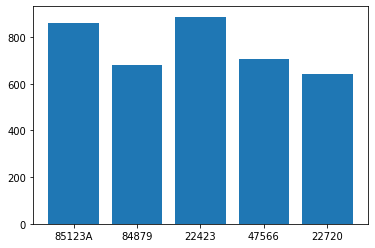

In [17]:
#Item best sold for each user
prods = df.ProdID.unique()
d = {i: 0 for i in prods} #prodotti venduti maggiormente
for customer in df.CustomerID.unique():
        result = df[df["CustomerID"] == customer]
        result = result.groupby("ProdID").sum()
        if(len(result)!=0):
                for i in range(len(result)):
                        d[result.iloc[i].name]+=1
                print("CustomerID ", customer, " : ", df[df["ProdID"]==result.iloc[0].name]["ProdDescr"].unique()[0])
        else: print("NO ACQUISTI CustomerID ", customer)

print("----------------------------------------------------------------------")
#prodotti più selezionati dai clienti
x = 5
d = {key: value for key, value in d.items() if value in sorted(set(d.values()), reverse=True)[:x]}

keys = d.keys()
values = d.values()
plt.bar(keys, values, align='center')
for i in d:
        print("ProdID: ", i, ": ", df[df["ProdID"]==i]["ProdDescr"].unique()[0])

        

Nazione  United Kingdom  :  INFLATABLE POLITICAL GLOBE 
Nazione  France  :  INFLATABLE POLITICAL GLOBE 
Nazione  Australia  :  ASSORTED COLOURS SILK FAN
Nazione  Netherlands  :  ASSORTED COLOURS SILK FAN
Nazione  Germany  :  INFLATABLE POLITICAL GLOBE 
Nazione  Norway  :  COLOURING PENCILS BROWN TUBE
Nazione  EIRE  :  INFLATABLE POLITICAL GLOBE 
Nazione  Switzerland  :  INFLATABLE POLITICAL GLOBE 
Nazione  Spain  :  INFLATABLE POLITICAL GLOBE 
Nazione  Poland  :  EDWARDIAN PARASOL BLACK
Nazione  Portugal  :  COLOURING PENCILS BROWN TUBE
Nazione  Italy  :  ASSORTED COLOURS SILK FAN
Nazione  Belgium  :  SANDALWOOD FAN
Nazione  Lithuania  :  EDWARDIAN PARASOL BLACK
Nazione  Japan  :  INFLATABLE POLITICAL GLOBE 
Nazione  Iceland  :  SMALL FOLDING SCISSOR(POINTED EDGE)
Nazione  Channel Islands  :  WRAP ENGLISH ROSE 
Nazione  Denmark  :  ASSORTED COLOURS SILK FAN
Nazione  Cyprus  :  EDWARDIAN PARASOL NATURAL
Nazione  Sweden  :  ASSORTED COLOURS SILK FAN
Nazione  Austria  :  EDWARDIAN PARASOL

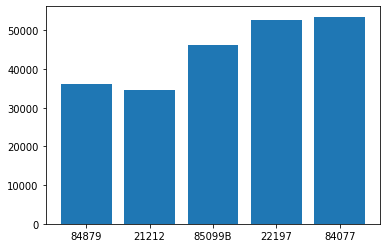

In [18]:
#Item best sold for each country and prodotti venduto maggiormente
from collections import Counter
prods = df.ProdID.unique()
d = {i: 0 for i in prods} #prodotti venduti maggiormente

for country in df.CustomerCountry.unique():
        result = df[df["CustomerCountry"] == country]
        result = result.groupby("ProdID").sum()
        for i in range(len(result)):
                d[result.iloc[i].name]+=result.iloc[i]["Qta"] 
        print("Nazione ", country, " : ", df[df["ProdID"]==result.iloc[0].name]["ProdDescr"].unique()[0])

print("----------------------------------------------------------------------")
#Primi X item più venduti tra le nazioni
x = 5
d = {key: value for key, value in d.items() if value in sorted(set(d.values()), reverse=True)[:x]}
keys = d.keys()
values = d.values()
plt.bar(keys, values, align='center')
for i in d:
        print("ProdID: ", i, ": ", df[df["ProdID"]==i]["ProdDescr"].unique()[0])
   
            
                
        

In [19]:
#acquisti per giorno 2010
temp = df.drop("CustomerID",axis=1)

temp["Total_Sale"] = temp["Sale"]*temp["Qta"]
temp["BasketDate"] = pd.to_datetime(temp['BasketDate']).dt.date
temp["BasketDate"] = pd.to_datetime(temp["BasketDate"] - pd.to_timedelta(1,unit="d") )
temp = temp[temp["BasketDate"] <= '2010-12-31']
res = (temp.groupby(pd.PeriodIndex(temp.BasketDate, freq='D'))
                  .sum()
                  .rename(columns=lambda c: str(c).lower()))
res.head(len(res))



,sale,qta,total_sale
BasketDate,,,
2010-11-30,9569.91,25347,52474.17
2010-12-01,6694.53,20915,45973.43
2010-12-02,7426.00,12717,33212.41
2010-12-04,7889.82,16394,31380.60
2010-12-05,11390.77,18730,40840.06
2010-12-06,30721.87,21799,48384.79
2010-12-07,7821.95,21955,40690.11
2010-12-08,8668.16,17915,42912.09
2010-12-09,8657.40,17658,44382.47


In [20]:
#acquisti per giorno 2011
temp = df.drop("CustomerID",axis=1)

temp["Total_Sale"] = temp["Sale"]*temp["Qta"]
temp["BasketDate"] = pd.to_datetime(temp['BasketDate']).dt.date
temp["BasketDate"] = pd.to_datetime(temp["BasketDate"] - pd.to_timedelta(1,unit="d") )
temp = temp[temp["BasketDate"] > '2010-12-31']
res = (temp.groupby(pd.PeriodIndex(temp.BasketDate, freq='D'))
                  .sum()
                  .rename(columns=lambda c: str(c).lower()))
res.head(len(res))
#mask=(temp['BasketDate'] > '2010-12-31' ) 
#print(temp[mask].groupby(pd.Grouper(key='BasketDate',freq='D'))["ProdID"].count())

,sale,qta,total_sale
BasketDate,,,
2011-01-03,3636.01,7235,13188.40
2011-01-04,21064.95,17754,13276.10
2011-01-05,6487.10,21850,33756.12
2011-01-06,4184.51,15428,24486.99
2011-01-08,3544.55,8181,15710.80
...,...,...,...
2011-12-04,34413.99,41374,63811.62
2011-12-05,8574.97,27890,49206.48
2011-12-06,6438.47,40175,71073.29


In [21]:
tot = 0
tot_sale = 0
#acquisti per trimestre 2010
temp = df.drop("CustomerID",axis=1)
temp["Total_Sale"] = temp["Sale"]*temp["Qta"]
temp["BasketDate"] = pd.to_datetime(temp['BasketDate']).dt.date
temp["BasketDate"] = pd.to_datetime(temp["BasketDate"] - pd.to_timedelta(1,unit="d") )
temp = temp[temp['BasketDate'] < "2011-01-01"] 
res = (temp.groupby(pd.PeriodIndex(temp.BasketDate, freq='Q'))
                  .sum()
                  .rename(columns=lambda c: str(c).lower()))
print(res.head())

#acquisti per trimestre 2011

temp = df.drop("CustomerID",axis=1)
temp["Total_Sale"] = temp["Sale"]*temp["Qta"]
temp["BasketDate"] = pd.to_datetime(temp['BasketDate']).dt.date
temp["BasketDate"] = pd.to_datetime(temp["BasketDate"] - pd.to_timedelta(1,unit="d") )
temp = temp[temp['BasketDate'] >= "2011-01-01"] 
res = (temp.groupby(pd.PeriodIndex(temp.BasketDate, freq='Q'))
                 .sum()
                  .rename(columns=lambda c: str(c).lower()))
print(res.head())


                 sale     qta  total_sale
BasketDate                               
2010Q4      156704.29  318134   650107.87
                  sale      qta   total_sale
BasketDate                                  
2011Q1      358485.390   926265  1638175.720
2011Q2      432933.081  1004501  1764746.111
2011Q3      378348.973  1316665  2215082.403
2011Q4      575771.430  1491674  2712457.140


Thursday     92815
Tuesday      84369
Wednesday    82049
Monday       80280
Friday       68609
Sunday       63788
Name: GiornoSettimana, dtype: int64


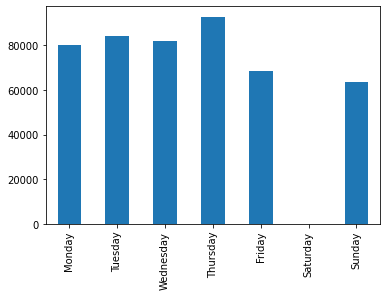

In [22]:
#acquisti per giorno della settimana
temp = df.copy()
temp["BasketDate"] = pd.to_datetime(temp['BasketDate']).dt.date
temp["GiornoSettimana"] = pd.to_datetime(temp['BasketDate']).dt.day_name()
print(temp.GiornoSettimana.value_counts())
#print(temp.GiornoSettimana.value_counts().plot.bar())

DAYS = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
temp.GiornoSettimana.value_counts().reindex(DAYS, fill_value=0).plot(kind="bar")

In [23]:
temp = df.drop("CustomerID",axis=1)
temp["BasketDate"] = pd.to_datetime(temp['BasketDate']).dt.date

temp["BasketDate"] = pd.to_datetime(temp["BasketDate"] - pd.to_timedelta(7,unit="d") )
temp["BasketDate"] = pd.to_datetime(temp['BasketDate']).dt.day_name()
print("Acquisti di sabato: ", temp[temp["BasketDate"]=="Saturday"]["BasketDate"].count())
print("Acquisti di sabato: ", temp[temp["BasketDate"]=="saturday"]["BasketDate"].count())

Acquisti di sabato:  0
Acquisti di sabato:  0


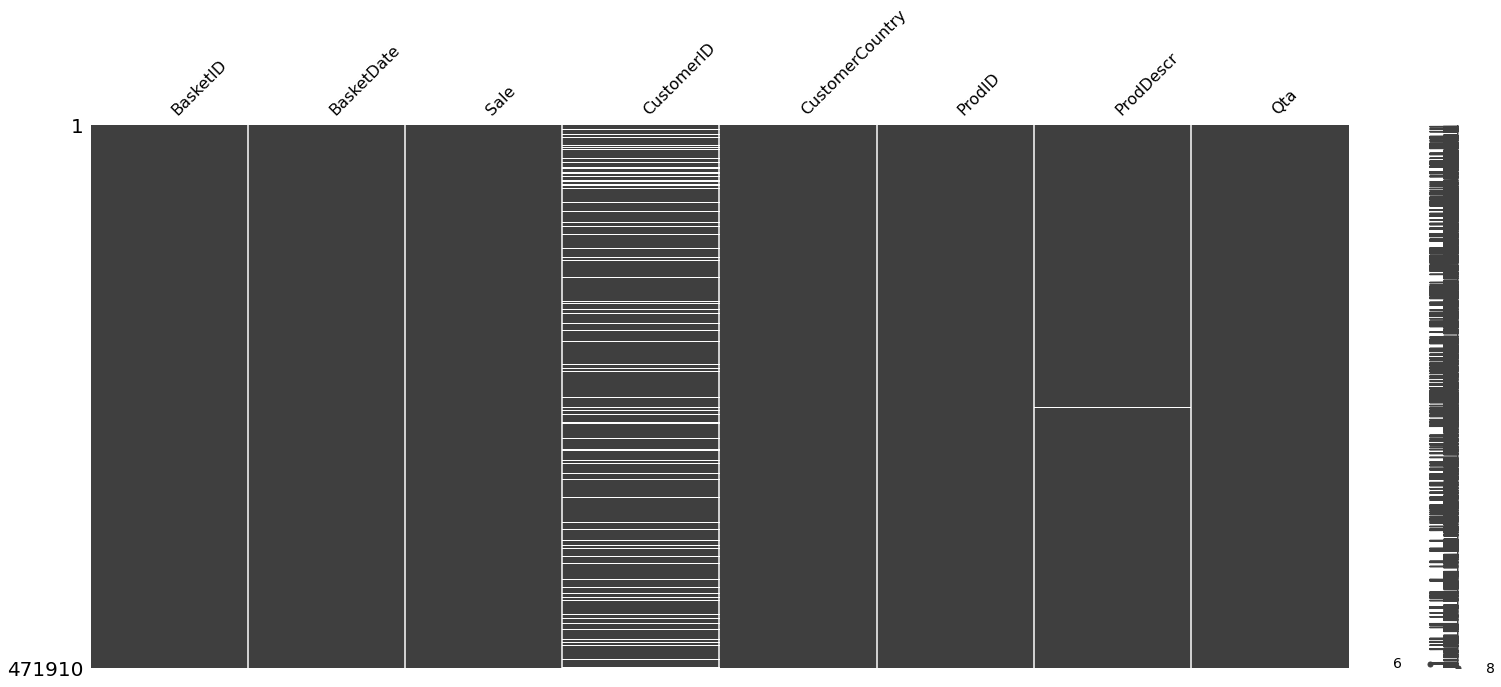

In [24]:
import missingno as msno
msno.matrix(df)
